# Data Science and Artificial Intelligence Mini Project
## Part 3: Model Optimization
### Team members: Jamie Sze, Tan Jie Hui, Wang Yi

In this section, we aim to evaluate different model optimization methods and their accuracy in this particular use case of classifying earthquake damage. To do so, we will explore the 5 methods and its effect on the accuracy of the Random Forest model. Afterwhich, we will use the most effective methods to build an optimized model to classify earthquake damage.

Overview of Implementation
1. <a href="#section1">Import Dataset</a>
2. <a href="#section2">Cleaning the Data for Model Training</a>
3. <a href="#section3">Random Tree Classifier</a>
4. <a href="#section4">Method 1: Feature Importance</a>
5. <a href="#section5">Method 2: Hyperparameter Tuning</a>
6. <a href="#section6">Method 3: Feature Engineering</a>
7. <a href="#section7">Method 4: Adaptive Boost</a>
8. <a href="#section8">Method 5: SMOTE</a>
9. <a href="#section9">Results</a>

## <a id='section1'>Import Dataset</a>

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy import stats
import sklearn.metrics
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report,accuracy_score

In [2]:
eqData_train1 = pd.read_csv('train_values.csv')
eqData_train1.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [3]:
eqData_train2 = pd.read_csv('train_labels.csv')
eqData_train2.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


Concatenate both train files into a single train dataset

In [4]:
cols = list(pd.read_csv("train_values.csv", nrows =1))
temp = pd.read_csv('train_values.csv',usecols =[i for i in cols if i != 'building_id'])

eqData_train = pd.concat([eqData_train2, temp], axis = 1)
eqData_train.head()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0


## <a id='section2'>Cleaning the Data for Model Training</a>
Perform One Hot Encoding


In [5]:
categoricalcolumns = ["land_surface_condition", "foundation_type","roof_type","ground_floor_type","other_floor_type","position","plan_configuration", "legal_ownership_status"]
eqData_train = pd.get_dummies(eqData_train, columns= categoricalcolumns, prefix= categoricalcolumns)
print(eqData_train)

        building_id  damage_grade  geo_level_1_id  geo_level_2_id  \
0            802906             3               6             487   
1             28830             2               8             900   
2             94947             3              21             363   
3            590882             2              22             418   
4            201944             3              11             131   
...             ...           ...             ...             ...   
260596       688636             2              25            1335   
260597       669485             3              17             715   
260598       602512             3              17              51   
260599       151409             2              26              39   
260600       747594             3              21               9   

        geo_level_3_id  count_floors_pre_eq  age  area_percentage  \
0                12198                    2   30                6   
1                 2812           

Drop 'building_id' from the dataset, and perform train_test_split.

In [6]:
TEST_SIZE = 0.2

filteredData1 = eqData_train

filteredData1 = eqData_train.drop(['building_id'], axis=1)
train_df, test_df = train_test_split(filteredData1, stratify=filteredData1['damage_grade'], test_size=TEST_SIZE)

train_X = train_df.drop("damage_grade", axis=1)
train_Y = train_df["damage_grade"]
test_X = test_df.drop("damage_grade", axis=1)
test_Y = test_df["damage_grade"]

## <a id='section3'>Random Tree Classifier</a>
In our previous analysis, we have selected the model "Random Forest Classifier" as our classification model. 
Now let's try to optimize this model to give us a higher accuracy in classification.

[2 2 2 ... 2 2 2]
The standard accuracy score is:  0.7087930009017479
The recall score is:  0.7087930009017479
The matthew's correlation coefficient is:  0.4560403633812692


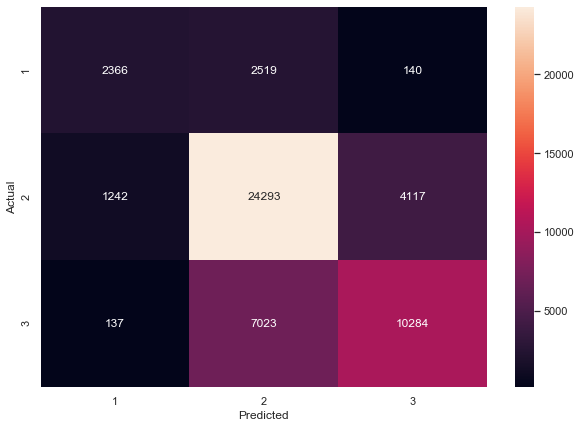

In [7]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=0,
                             criterion="gini",
                             n_estimators=50,
                             verbose=False)

clf.fit(train_X, train_Y.values)
preds = clf.predict(test_X)
print(preds)

print("The standard accuracy score is: ", accuracy_score(test_Y.values, preds))
print("The recall score is: ", sklearn.metrics.recall_score(test_Y.values, preds, average='micro'))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(test_Y.values, preds))

cm = pd.crosstab(test_Y.values, preds, rownames=['Actual'], colnames=['Predicted'])

#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.show()

In [8]:
# PRINT F1 SCORE
from sklearn.metrics import f1_score
print("----------F1 Score--------")
train_predictions = clf.predict(train_X)
print("TRAIN:", f1_score(train_Y, train_predictions, average='micro'))
test_predictions = clf.predict(test_X)
print("TEST :", f1_score(test_Y, test_predictions, average='micro'))

----------F1 Score--------
TRAIN: 0.986636607828089
TEST : 0.7087930009017479


## <a id='section4'>Method 1: Feature Importance</a>
As there are many variables and not all of them are useful for building the model, we select the subset of the most important variables for model optimization

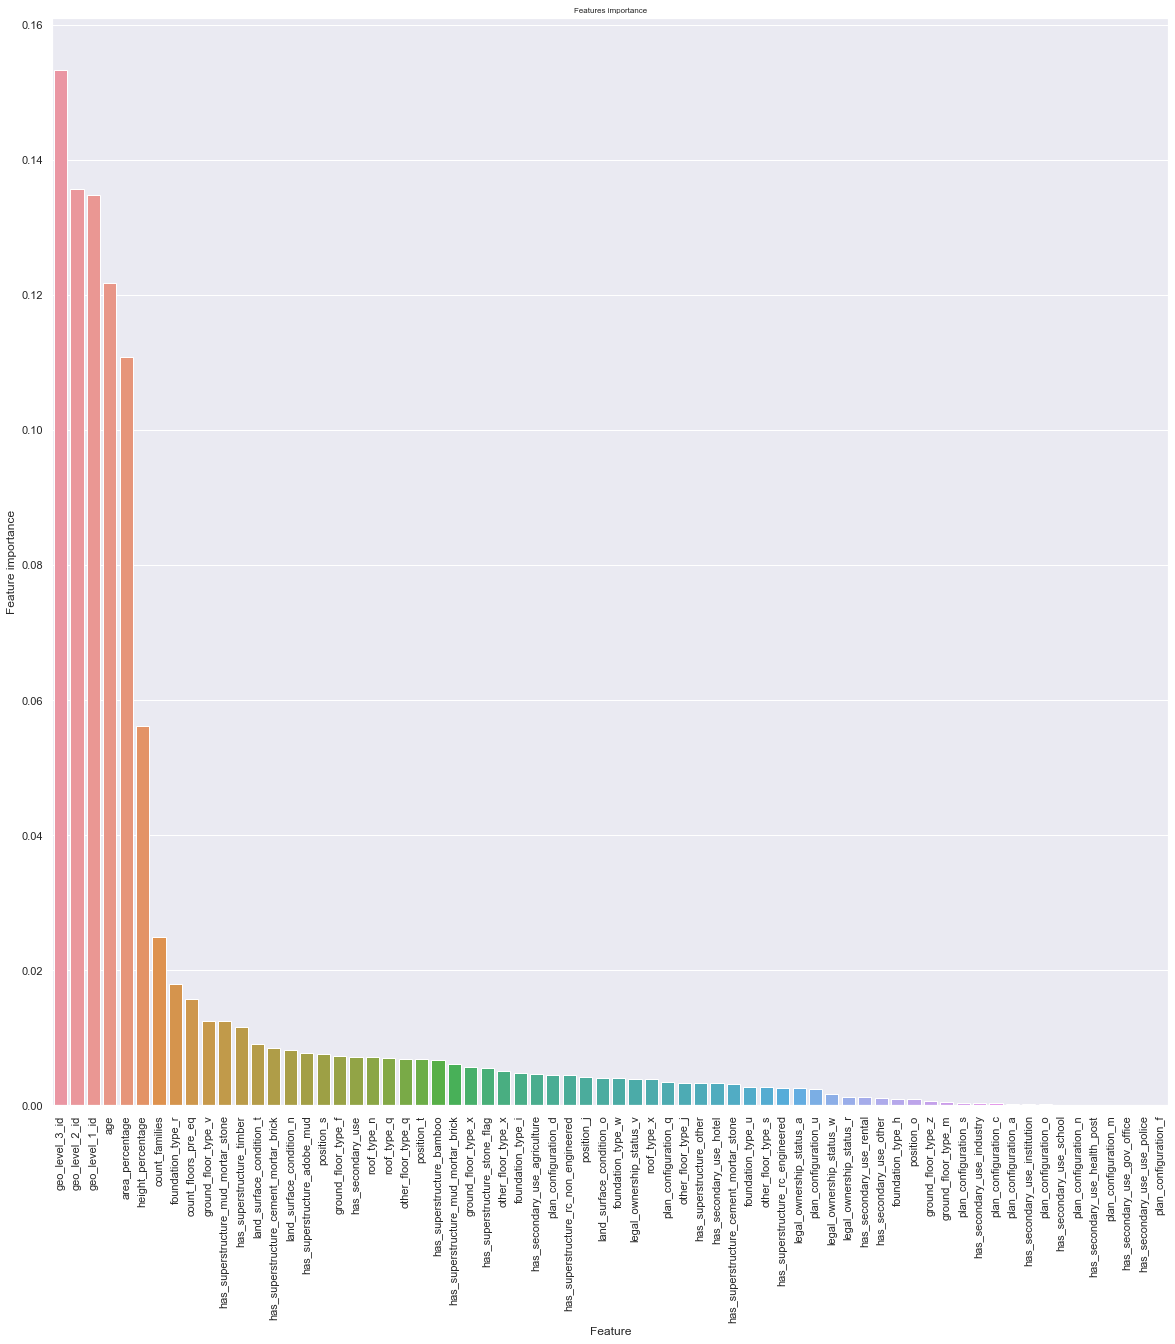

In [9]:
tmp = pd.DataFrame({'Feature': train_X.columns, 'Feature importance': clf.feature_importances_})
tmp1 = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (20,20))
plt.title('Features importance',fontsize=8)
s = sb.barplot(x='Feature',y='Feature importance',data=tmp1)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [18]:
# List of features sorted from most to least important
sorted_importances = pd.DataFrame(tmp1['Feature importance'])
sorted_features = pd.DataFrame(tmp1['Feature'])
print(sorted_importances)
print(sorted_features)

    Feature importance
2             0.153316
1             0.135631
0             0.134848
4             0.121786
5             0.110850
..                 ...
26            0.000054
58            0.000037
27            0.000037
28            0.000030
57            0.000017

[68 rows x 1 columns]
                          Feature
2                  geo_level_3_id
1                  geo_level_2_id
0                  geo_level_1_id
4                             age
5                 area_percentage
..                            ...
26  has_secondary_use_health_post
58           plan_configuration_m
27   has_secondary_use_gov_office
28   has_secondary_use_use_police
57           plan_configuration_f

[68 rows x 1 columns]


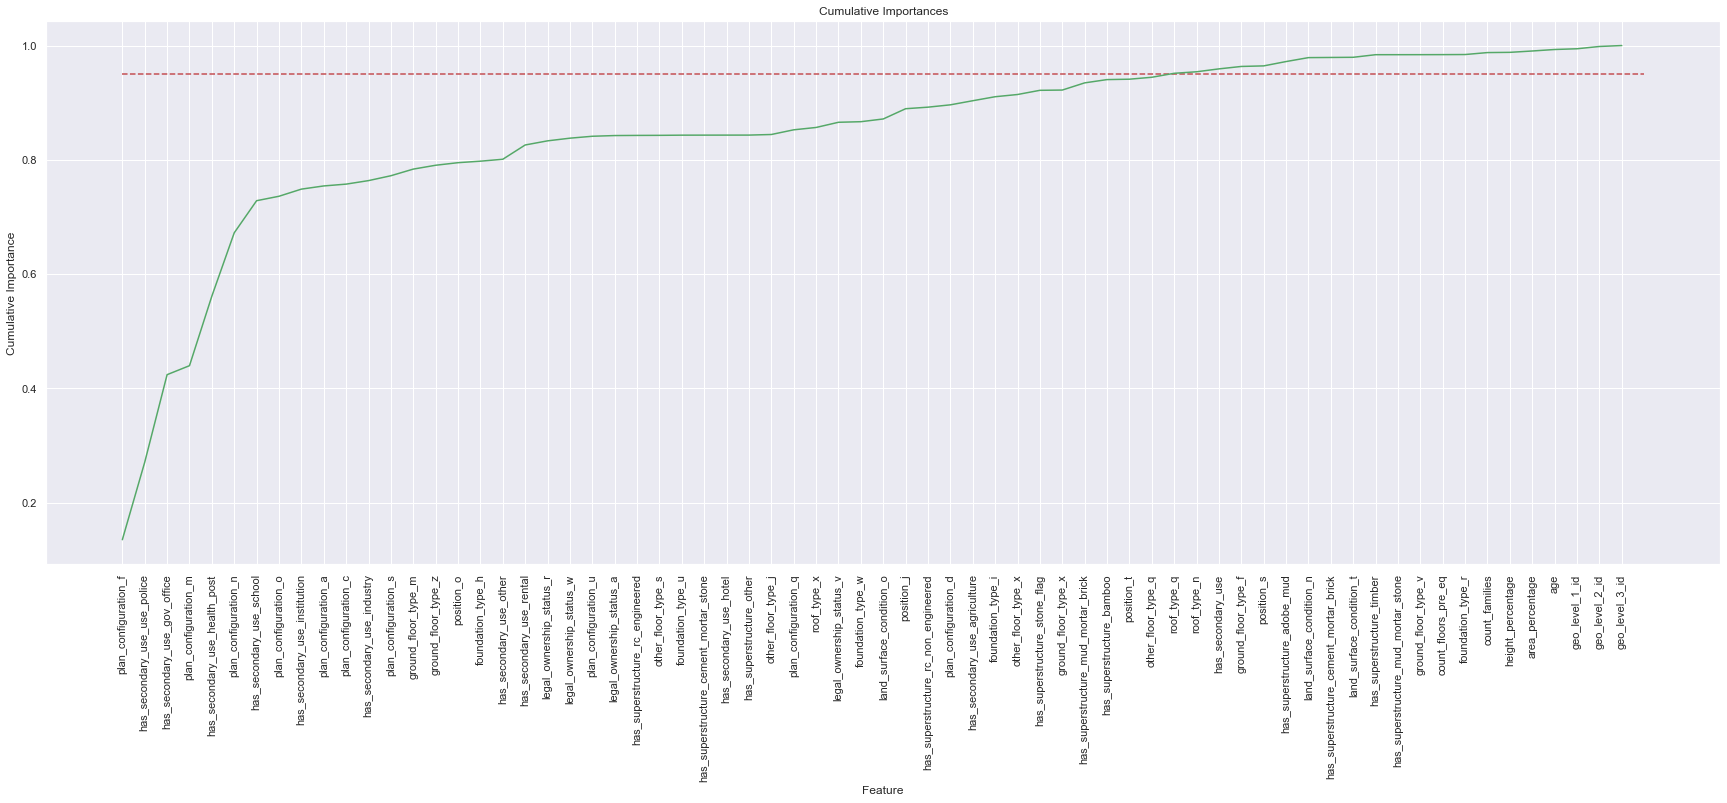

In [19]:
importance = clf.feature_importances_

featurelist = []
for c in train_X.columns:
    featurelist.append(c)

indices = np.argsort(importance)
cumulativeimpt= np.cumsum(importance)
featurerank = [featurelist[i] for i in indices]


plt.figure(figsize=(30,10))
plt.plot(featurerank, cumulativeimpt, 'g-')
plt.xticks(featurerank, rotation = 'vertical')
plt.xlabel('Feature')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importances')

plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

In [20]:
countimpt = 0
for i in cumulativeimpt:
    if i >= 0.95:
        countimpt += 1
    
print('Number of features for 95% importance:', countimpt)

Number of features for 95% importance: 21


In [21]:
# Extract the names of the most important features
important_feature_names = [sorted_features[0:21]] 
print (important_feature_names)

[                                   Feature
2                           geo_level_3_id
1                           geo_level_2_id
0                           geo_level_1_id
4                                      age
5                          area_percentage
6                        height_percentage
18                          count_families
35                       foundation_type_r
3                      count_floors_pre_eq
43                     ground_floor_type_v
8      has_superstructure_mud_mortar_stone
13               has_superstructure_timber
32                land_surface_condition_t
12  has_superstructure_cement_mortar_brick
30                land_surface_condition_n
7             has_superstructure_adobe_mud
52                              position_s
41                     ground_floor_type_f
19                       has_secondary_use
38                             roof_type_n
39                             roof_type_q]


Train the model based on the these selected features

In [22]:
train_X_new = train_X[['geo_level_3_id' , 'geo_level_2_id', 'geo_level_1_id' , 'age', 'area_percentage', 'height_percentage' , 'count_families', 'foundation_type_r','count_floors_pre_eq', 'has_superstructure_mud_mortar_stone', 'has_superstructure_timber','ground_floor_type_v','land_surface_condition_t','land_surface_condition_n','position_s','has_superstructure_adobe_mud','has_superstructure_cement_mortar_brick','ground_floor_type_f','has_secondary_use','roof_type_n','roof_type_q']]
test_X_new = test_X[['geo_level_3_id' , 'geo_level_2_id', 'geo_level_1_id' , 'age', 'area_percentage', 'height_percentage' , 'count_families', 'foundation_type_r','count_floors_pre_eq', 'has_superstructure_mud_mortar_stone', 'has_superstructure_timber','ground_floor_type_v','land_surface_condition_t','land_surface_condition_n','position_s','has_superstructure_adobe_mud','has_superstructure_cement_mortar_brick','ground_floor_type_f','has_secondary_use','roof_type_n','roof_type_q']]

[2 2 2 ... 3 2 2]
The standard accuracy score is:  0.7104238214922968
The recall score is:  0.7104238214922968
The matthew's correlation coefficient is:  0.4596135678471123


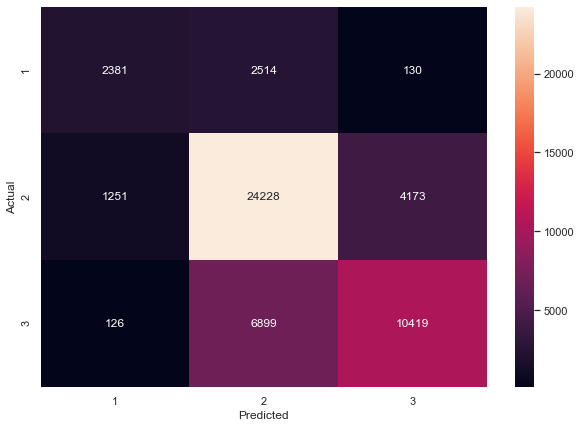

In [23]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=0,
                             criterion="gini",
                             n_estimators=50,
                             verbose=False)

clf.fit(train_X_new, train_Y.values)
preds = clf.predict(test_X_new)
print(preds)

print("The standard accuracy score is: ", accuracy_score(test_Y.values, preds))
print("The recall score is: ", sklearn.metrics.recall_score(test_Y.values, preds, average='micro'))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(test_Y.values, preds))

cm = pd.crosstab(test_Y.values, preds, rownames=['Actual'], colnames=['Predicted'])

#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.show()

The accuracy of the model has improved with feature selection

## <a id='section5'>Method 2: Hyperparameter Tuning</a>

In [24]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 0,
 'verbose': False,
 'warm_start': False}


After exploration of the different hyperparameters, we have decided to focus on tuning the most important primary hyperparameters
1. max_depth
2. n_estimators
3. min_samples_leaf
4. min_samples_split
5. max_features

These are the hyperparameters in the model which we can adjust to build the optimum model for the dataset.

In [2]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
print(RandomForestClassifier())
print(RandomForestRegressor())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      rand

In [21]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
}

In [29]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5,n_jobs=4)
cv.fit(train_X,train_Y.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [30]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [31]:
display(cv)

Best parameters are: {'max_depth': 32, 'n_estimators': 250}


0.572 + or -0.002 for the {'max_depth': 2, 'n_estimators': 5}
0.571 + or -0.002 for the {'max_depth': 2, 'n_estimators': 10}
0.569 + or -0.0 for the {'max_depth': 2, 'n_estimators': 50}
0.569 + or -0.0 for the {'max_depth': 2, 'n_estimators': 100}
0.569 + or -0.0 for the {'max_depth': 2, 'n_estimators': 250}
0.577 + or -0.001 for the {'max_depth': 4, 'n_estimators': 5}
0.576 + or -0.001 for the {'max_depth': 4, 'n_estimators': 10}
0.577 + or -0.0 for the {'max_depth': 4, 'n_estimators': 50}
0.577 + or -0.0 for the {'max_depth': 4, 'n_estimators': 100}
0.577 + or -0.001 for the {'max_depth': 4, 'n_estimators': 250}
0.608 + or -0.004 for the {'max_depth': 8, 'n_estimators': 5}
0.618 + or -0.011 for the {'max_depth': 8, 'n_estimators': 10}
0.616 + or -0.002 for the {'max_depth': 8, 'n_estimators': 50}
0.61 + or -0.006 for the {'max_depth': 8, 'n_estimators': 100}
0.614 + or -0.001 for the {'max_depth': 8, 'n_estimators': 250}
0

We have decided to stop exploring for higher values of these two parameters as higher values will reduce the speed of running the model significantly, it may also lead to over-fitting.

In [10]:
rfc = RandomForestClassifier()
parameters = {
    'min_samples_leaf':[1,2,3,4,5],
    'min_samples_split':[2,4,6,8,10],
}

In [11]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5,n_jobs=-1)
cv.fit(train_X,train_Y.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [12]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [13]:
display(cv)

Best parameters are: {'min_samples_leaf': 1, 'min_samples_split': 10}


0.711 + or -0.003 for the {'min_samples_leaf': 1, 'min_samples_split': 2}
0.718 + or -0.002 for the {'min_samples_leaf': 1, 'min_samples_split': 4}
0.72 + or -0.002 for the {'min_samples_leaf': 1, 'min_samples_split': 6}
0.721 + or -0.002 for the {'min_samples_leaf': 1, 'min_samples_split': 8}
0.721 + or -0.002 for the {'min_samples_leaf': 1, 'min_samples_split': 10}
0.718 + or -0.002 for the {'min_samples_leaf': 2, 'min_samples_split': 2}
0.717 + or -0.001 for the {'min_samples_leaf': 2, 'min_samples_split': 4}
0.717 + or -0.001 for the {'min_samples_leaf': 2, 'min_samples_split': 6}
0.716 + or -0.002 for the {'min_samples_leaf': 2, 'min_samples_split': 8}
0.716 + or -0.002 for the {'min_samples_leaf': 2, 'min_samples_split': 10}
0.712 + or -0.002 for the {'min_samples_leaf': 3, 'min_samples_split': 2}
0.713 + or -0.002 for the {'min_samples_leaf': 3, 'min_samples_split': 4}
0.713 + or -0.002 for the {'min_samples

As the optimum is 10 for min_samples_split, we will try higher values than 10 to see if it improves the accuracy of the model

In [14]:
rfc = RandomForestClassifier()
parameters = {
    'min_samples_split':[10,14,18,22,26],
}

In [22]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5,n_jobs=-1)
cv.fit(train_X,train_Y.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [23]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [24]:
display(cv)

Best parameters are: {'min_samples_split': 10}


0.721 + or -0.002 for the {'min_samples_split': 10}
0.72 + or -0.002 for the {'min_samples_split': 14}
0.719 + or -0.002 for the {'min_samples_split': 18}
0.718 + or -0.002 for the {'min_samples_split': 22}
0.716 + or -0.002 for the {'min_samples_split': 26}


In [26]:
rfc = RandomForestClassifier()
parameters = {
    'max_features':['auto','sqrt','log2'],
}

In [27]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5,n_jobs=-1)
cv.fit(train_X,train_Y.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [28]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [29]:
display(cv)

Best parameters are: {'max_features': 'auto'}


0.712 + or -0.002 for the {'max_features': 'auto'}
0.711 + or -0.002 for the {'max_features': 'sqrt'}
0.707 + or -0.002 for the {'max_features': 'log2'}


Performing trial and error, we have obtained the optimum common hyperparameters for this model
1. 'min_samples_split': 10
2. 'min_samples_leaf': 1
3. 'max_depth': 32
4. 'n_estimators': 250
5. max_features': 'auto'

[2 2 2 ... 2 2 2]
The standard accuracy score is:  0.7208610732718098
The recall score is:  0.7208610732718098
The matthew's correlation coefficient is:  0.47380737453148075


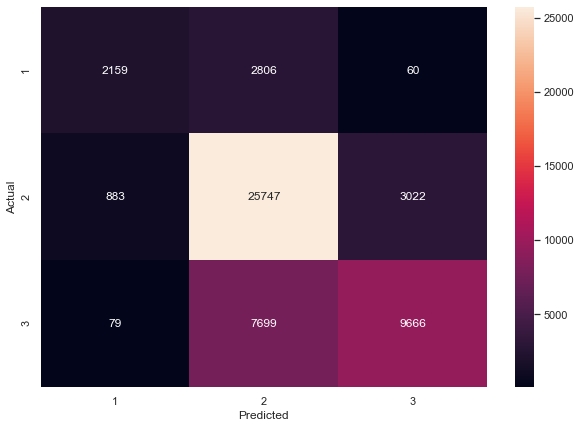

In [25]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=0,
                             min_samples_leaf = 1,
                             min_samples_split =10,
                             max_depth = 32,
                             criterion="gini",
                             n_estimators=250,
                             verbose=False)

clf.fit(train_X, train_Y.values)
preds = clf.predict(test_X)
print(preds)

print("The standard accuracy score is: ", accuracy_score(test_Y.values, preds))
print("The recall score is: ", sklearn.metrics.recall_score(test_Y.values, preds, average='micro'))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(test_Y.values, preds))

cm = pd.crosstab(test_Y.values, preds, rownames=['Actual'], colnames=['Predicted'])

#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.show()

Accuracy has improved with hyperparameter tuning.

However, from our research, hyperparameter tuning is good to create a model for classification. Hence, it is not always the best to perform on Random Forest as it is already good in classification. Using exhaustive grid search to choose hyperparameter values can be very time-consuming as well.

As such, it is only advantageous to tune the important hyperparameters for Random Forest classification model when there are only a few potential values for hyperparameters or when the initial classifcation model isn't very accurate.

Hence, we have decided to only focus on tuning the most common hyperparameters instead of spending time to finetune all the parameters.

## <a id='section6'>Method 3: Feature Engineering</a>

Feature Engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms.
Previously, we have carry out one-hot encoding as part of Feature Engineering, now we will explore more into it.

1. Testing for Missing data

In [26]:
train_X.isnull().sum().sort_values(ascending=False)

legal_ownership_status_w         0
has_secondary_use_school         0
count_families                   0
has_secondary_use                0
has_secondary_use_agriculture    0
                                ..
roof_type_q                      0
roof_type_n                      0
foundation_type_w                0
foundation_type_u                0
geo_level_1_id                   0
Length: 68, dtype: int64

In [27]:
test_X.isnull().sum().sort_values(ascending=False)

legal_ownership_status_w         0
has_secondary_use_school         0
count_families                   0
has_secondary_use                0
has_secondary_use_agriculture    0
                                ..
roof_type_q                      0
roof_type_n                      0
foundation_type_w                0
foundation_type_u                0
geo_level_1_id                   0
Length: 68, dtype: int64

Hence, there are no missing values in the dataset; no need for Feature Engineering here

2. Outlier Capping

From our previous data exploration, the variables age, height_percentage and area_percentage are highly skewed with extreme outliers

In [40]:
from feature_engine import outlier_removers as outr

# set up the capper
capper = outr.Winsorizer(
        distribution='gaussian', tail='both', fold=1.5, variables=['age', 'area_percentage','height_percentage'])

# fit the capper
capper.fit(train_X)

# transform the data
train_t= capper.transform(train_X)
test_t= capper.transform(test_X)

capper.right_tail_caps_

{'age': 138.1612479005796,
 'area_percentage': 14.639003265671535,
 'height_percentage': 8.302023958569734}

We have finetuned the parameters used in this method by doing repeated trial and error, obtaining: 
1. fold = 1.5
2. distribution = 'gaussian'
3. tail = 'both'


[2 2 3 ... 2 2 2]
The standard accuracy score is:  0.7109610329809481
The recall score is:  0.7109610329809481
The matthew's correlation coefficient is:  0.4600192458505387


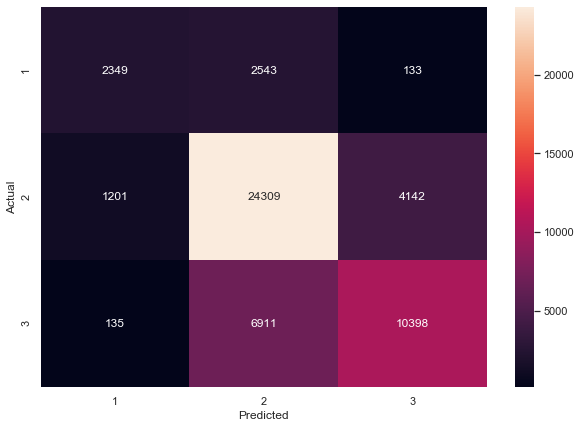

In [41]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=0,
                             criterion="gini",
                             n_estimators=50,
                             verbose=False)

clf.fit(train_t, train_Y.values)
preds = clf.predict(test_t)
print(preds)

print("The standard accuracy score is: ", accuracy_score(test_Y.values, preds))
print("The recall score is: ", sklearn.metrics.recall_score(test_Y.values, preds, average='micro'))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(test_Y.values, preds))

cm = pd.crosstab(test_Y.values, preds, rownames=['Actual'], colnames=['Predicted'])

#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.show()

Accuracy improves with outlier capping

3. Variable Discretisaion

Test if the model improves if we convert continuous variables into discrete form.

Select the most important continuous variables as described by Feature Importance and perform trial and error, the accuracy improves with geo_level_3_id at bins = 120 and geo_level_1_id at bins = 40.

In [80]:
from feature_engine import discretisers as dsc

# set up the discretisation transformer
disc = dsc.EqualWidthDiscretiser(bins=120, variables=['geo_level_3_id'])

# fit the transformer
disc.fit(train_X)

# transform the data
train_g= disc.transform(train_X)
test_g= disc.transform(test_X)

disc.binner_dict_

{'geo_level_3_id': [-inf,
  104.725,
  209.45,
  314.17499999999995,
  418.9,
  523.625,
  628.3499999999999,
  733.0749999999999,
  837.8,
  942.525,
  1047.25,
  1151.975,
  1256.6999999999998,
  1361.425,
  1466.1499999999999,
  1570.875,
  1675.6,
  1780.3249999999998,
  1885.05,
  1989.7749999999999,
  2094.5,
  2199.225,
  2303.95,
  2408.6749999999997,
  2513.3999999999996,
  2618.125,
  2722.85,
  2827.575,
  2932.2999999999997,
  3037.0249999999996,
  3141.75,
  3246.475,
  3351.2,
  3455.9249999999997,
  3560.6499999999996,
  3665.375,
  3770.1,
  3874.825,
  3979.5499999999997,
  4084.2749999999996,
  4189.0,
  4293.724999999999,
  4398.45,
  4503.175,
  4607.9,
  4712.625,
  4817.349999999999,
  4922.075,
  5026.799999999999,
  5131.525,
  5236.25,
  5340.974999999999,
  5445.7,
  5550.424999999999,
  5655.15,
  5759.875,
  5864.599999999999,
  5969.325,
  6074.049999999999,
  6178.775,
  6283.5,
  6388.224999999999,
  6492.95,
  6597.674999999999,
  6702.4,
  6807.125,
  6

In [81]:
from feature_engine import discretisers as dsc

# set up the discretisation transformer
disc = dsc.EqualWidthDiscretiser(bins=40, variables=['geo_level_1_id'])

# fit the transformer
disc.fit(train_g)

# transform the data
train_g1= disc.transform(train_g)
test_g1= disc.transform(test_g)

disc.binner_dict_

{'geo_level_1_id': [-inf,
  0.75,
  1.5,
  2.25,
  3.0,
  3.75,
  4.5,
  5.25,
  6.0,
  6.75,
  7.5,
  8.25,
  9.0,
  9.75,
  10.5,
  11.25,
  12.0,
  12.75,
  13.5,
  14.25,
  15.0,
  15.75,
  16.5,
  17.25,
  18.0,
  18.75,
  19.5,
  20.25,
  21.0,
  21.75,
  22.5,
  23.25,
  24.0,
  24.75,
  25.5,
  26.25,
  27.0,
  27.75,
  28.5,
  29.25,
  inf]}

[2 2 2 ... 2 2 2]
The standard accuracy score is:  0.7098290516298613
The recall score is:  0.7098290516298613
The matthew's correlation coefficient is:  0.45819141292994975


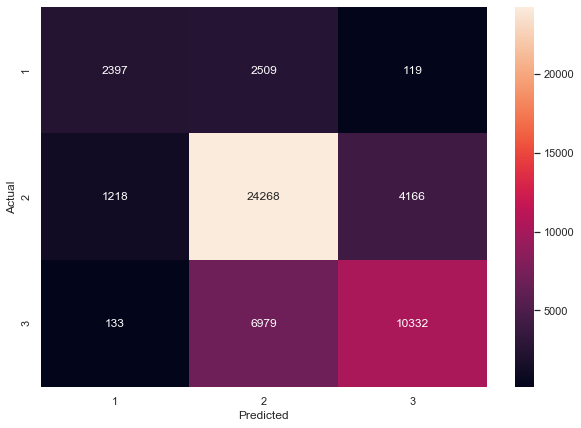

In [82]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=0,
                             criterion="gini",
                             n_estimators=50,
                             verbose=False)

clf.fit(train_g1, train_Y.values)
preds = clf.predict(test_g1)
print(preds)

print("The standard accuracy score is: ", accuracy_score(test_Y.values, preds))
print("The recall score is: ", sklearn.metrics.recall_score(test_Y.values, preds, average='micro'))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(test_Y.values, preds))

cm = pd.crosstab(test_Y.values, preds, rownames=['Actual'], colnames=['Predicted'])

#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.show()

4. Data Scaling

Feature Scaling is a method used to normalize the range of independent variables or features of data.

In [83]:
from sklearn.preprocessing import scale

# Create a new copy of the data
X_train_scaled = train_X[np.isfinite(train_X)]
X_test_scaled = test_X[np.isfinite(test_X)]

# Go through all columns and scale the values in each
for column in X_train_scaled.columns:
    column_data = scale(X_train_scaled[column].dropna())
    X_train_scaled[column] = column_data
    
for column in X_test_scaled.columns:
    column_data = scale(X_test_scaled[column].dropna())
    X_test_scaled[column] = column_data
    
display (X_test_scaled)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
113907,-1.230001,1.527720,0.809074,-0.182217,-0.158322,-0.925025,0.285748,-0.312311,0.559615,-0.186833,...,-0.014529,-0.009795,-0.02629,-0.152461,-0.031905,-0.118353,-0.141493,-0.075317,0.192693,-0.103176
178415,1.630743,-1.269752,-0.517039,2.561887,0.197110,1.158580,1.834783,-0.312311,-1.786942,-0.186833,...,-0.014529,-0.009795,-0.02629,-0.152461,-0.031905,-0.118353,-0.141493,-0.075317,0.192693,-0.103176
110012,-0.110580,-0.439973,0.355634,-0.182217,-0.371582,-0.230490,-0.230597,-0.312311,0.559615,-0.186833,...,-0.014529,-0.009795,-0.02629,-0.152461,-0.031905,-0.118353,-0.141493,-0.075317,0.192693,-0.103176
28244,-0.483720,-0.891256,-1.631620,-0.182217,-0.016150,-0.925025,-0.230597,-0.312311,0.559615,-0.186833,...,-0.014529,-0.009795,-0.02629,-0.152461,-0.031905,-0.118353,-0.141493,-0.075317,0.192693,-0.103176
22923,-0.483720,-0.697156,0.981474,-0.182217,0.481455,-1.156537,-0.230597,-0.312311,0.559615,-0.186833,...,-0.014529,-0.009795,-0.02629,-0.152461,-0.031905,-0.118353,-0.141493,-0.075317,0.192693,-0.103176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161537,0.386941,-0.973749,0.705907,1.189835,-0.158322,0.001022,1.318438,-0.312311,0.559615,-0.186833,...,-0.014529,-0.009795,-0.02629,-0.152461,-0.031905,-0.118353,-0.141493,-0.075317,0.192693,-0.103176
237331,-0.608100,-0.629221,0.245079,-1.554270,-0.300495,1.621604,-0.746943,-0.312311,-1.786942,-0.186833,...,-0.014529,-0.009795,-0.02629,-0.152461,-0.031905,-0.118353,-0.141493,-0.075317,0.192693,-0.103176
226045,0.262561,-1.616707,-0.094522,-0.182217,0.481455,1.853115,-0.230597,-0.312311,0.559615,-0.186833,...,-0.014529,-0.009795,-0.02629,-0.152461,-0.031905,8.449277,-0.141493,-0.075317,0.192693,-0.103176
66724,1.506362,1.238996,1.131982,-0.182217,-0.229409,-0.230490,0.802093,3.201933,0.559615,-0.186833,...,-0.014529,-0.009795,-0.02629,-0.152461,-0.031905,-0.118353,-0.141493,-0.075317,0.192693,-0.103176


[2 2 2 ... 2 2 2]
The standard accuracy score is:  0.7069319468160626
The recall score is:  0.7069319468160626
The matthew's correlation coefficient is:  0.45210871593853247


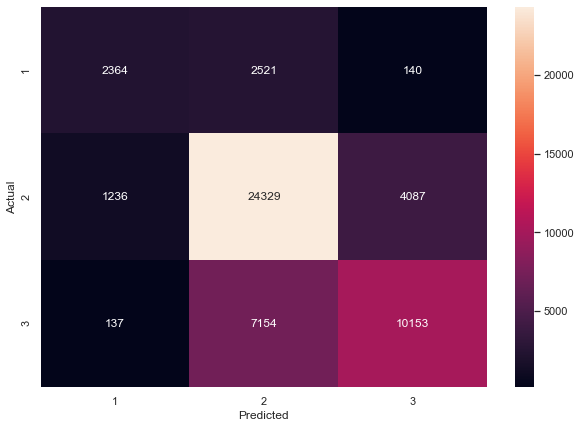

In [84]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=0,
                             criterion="gini",
                             n_estimators=50,
                             verbose=False)

clf.fit(X_train_scaled, train_Y.values)
preds = clf.predict(X_test_scaled)
print(preds)

print("The standard accuracy score is: ", accuracy_score(test_Y.values, preds))
print("The recall score is: ", sklearn.metrics.recall_score(test_Y.values, preds, average='micro'))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(test_Y.values, preds))

cm = pd.crosstab(test_Y.values, preds, rownames=['Actual'], colnames=['Predicted'])

#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.show()

Accuracy does not improve with Data Scaling
- Mostly likely due to the fact that tree based models (like Random Forest) are not distance-based models and can handle varying ranges of features. Hence, Scaling is not required while modelling trees.

5. Variable Transformation

We will also use Principal Component Analysis (PCA) here as it helps to speed up machine learning algorithms

In [85]:
from sklearn.decomposition import PCA
pca_2D = PCA(n_components=2)
pca_output_2D = pca_2D.fit_transform(train_X.values)
print('Explained variation per principal component: {}'.format(pca_2D.explained_variance_ratio_))

Explained variation per principal component: [0.98691745 0.01266508]


In [86]:
pca_output_2D=pd.DataFrame(pca_output_2D)
pca_output_2D.columns=['x','y']
pca_output_2D.head()

,x,y
0,-4397.707171,183.607514
1,555.150596,-544.344707
2,719.249173,-51.438642
3,1250.337695,406.483877
4,3239.204926,-278.932746


After repeated trial and error, we have performed variable transformation on the following features which has improved the model accuracy.

In [87]:
#Log geo_level_2/3 
train_X['geo_level_3_id'] = np.log(train_X['geo_level_3_id'].replace(0, 1))
test_X['geo_level_3_id'] = np.log(test_X['geo_level_3_id'].replace(0, 1))
train_X['geo_level_2_id'] = np.log(train_X['geo_level_2_id'].replace(0, 1))
test_X['geo_level_2_id'] = np.log(test_X['geo_level_2_id'].replace(0, 1))
display (train_X)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
242365,11,6.783325,7.528332,3,30,10,9,0,0,0,...,0,0,0,0,0,0,0,0,1,0
117852,17,5.049856,8.826588,2,35,4,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
126550,22,6.475433,8.850374,2,15,9,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
153268,12,7.009409,8.923724,2,20,4,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
191346,27,6.045005,9.158731,2,15,7,6,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121532,6,7.133296,2.995732,4,70,4,8,0,0,0,...,0,0,0,0,0,0,0,0,1,0
243289,16,5.863631,7.997663,2,20,9,6,0,1,0,...,0,0,0,0,0,0,0,0,1,0
222425,7,6.614726,8.519391,2,15,15,6,0,1,0,...,0,0,0,0,0,0,0,0,1,0
62782,1,7.165493,6.758095,2,10,15,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [114]:
# Age 995 (Binary)
train_X.loc[train_X.age == 995, 'Age 995'] = '1' 
train_X.loc[train_X.age != 995, 'Age 995'] = '0' 
train_X['Age 995'] = train_X[['Age 995']].apply(pd.to_numeric)
test_X.loc[test_X.age == 995, 'Age 995'] = '1' 
test_X.loc[test_X.age != 995, 'Age 995'] = '0' 
test_X['Age 995'] = test_X[['Age 995']].apply(pd.to_numeric)

[2 2 2 ... 2 2 2]
The standard accuracy score is:  0.7092342817674258
The recall score is:  0.7092342817674258
The matthew's correlation coefficient is:  0.4568501883760231


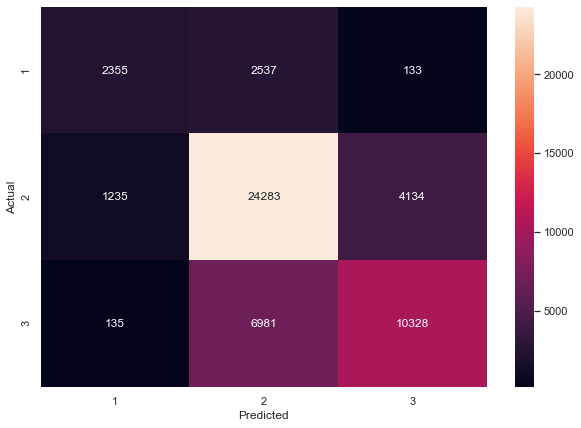

In [115]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=0,
                             criterion="gini",
                             n_estimators=50,
                             verbose=False)

clf.fit(train_X, train_Y.values)
preds = clf.predict(test_X)
print(preds)

print("The standard accuracy score is: ", accuracy_score(test_Y.values, preds))
print("The recall score is: ", sklearn.metrics.recall_score(test_Y.values, preds, average='micro'))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(test_Y.values, preds))

cm = pd.crosstab(test_Y.values, preds, rownames=['Actual'], colnames=['Predicted'])

#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.show()

## <a id='section7'> Method 4: Adaptive Boost </a>
AdaBoost, short for “Adaptive Boosting”, focuses on classification problems and aims to convert a set of weak classifiers into a strong one. 
Here we propose a combination of the Random Forest Classifier and Adaboost to generate a stronger model.

In [117]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics

In [118]:
AdaBoost = AdaBoostClassifier(base_estimator = clf, learning_rate=1)
boostmodel = AdaBoost.fit(train_X, train_Y)

In [119]:
preds = boostmodel.predict(test_X)
predictions = accuracy_score(test_Y,preds)

print("Accuracy of model =", predictions)
print("The standard accuracy score is: ", accuracy_score(test_Y.values, preds))
print("The recall score is: ", sklearn.metrics.recall_score(test_Y.values, preds, average='micro'))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(test_Y.values, preds))

Accuracy of model = 0.7054162429730819
The standard accuracy score is:  0.7054162429730819
The recall score is:  0.7054162429730819
The matthew's correlation coefficient is:  0.4460597334896936


The model accuracy has not improved with the use of Adaboost and this is likely due to several factor such as: 
1. The hyperparamters in Adaboost itself are not optimized 
2. Data imbalance leads to a decrease in classification accuracy

However, we have decided to not go deeper into it as the optimization of hyperparameters in Adaboost and implementation of the model itself may be too time-consuming for our problem statement.

## <a id='section8'> Method 5: SMOTE </a>
Synthetic Minority Oversampling Technique (SMOTE) is a data augmentation method for the minority class in imbalanced data sheets.

In [120]:
from imblearn.over_sampling import SMOTE
smote = SMOTE ('minority')
smoted_X, smoted_Y = smote.fit_sample(train_X, train_Y)
print (train_X.shape, train_Y.shape)
print (smoted_X.shape, smoted_Y.shape)

Using TensorFlow backend.


(208480, 69) (208480,)
(306988, 69) (306988,)


[2 2 2 ... 3 2 2]
The standard accuracy score is:  0.6990080773584544
The recall score is:  0.6990080773584544
The matthew's correlation coefficient is:  0.44948840727855766


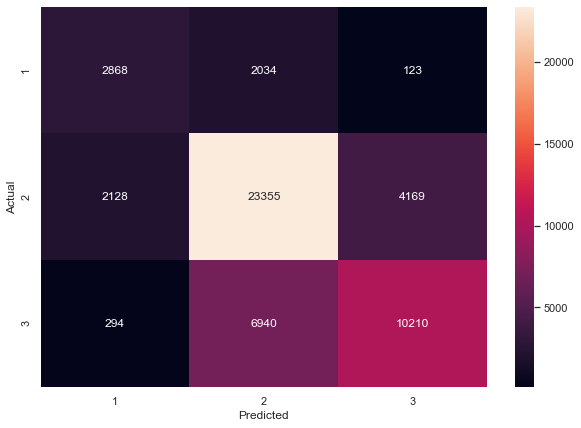

In [121]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=0,
                             criterion="gini",
                             n_estimators=50,
                             verbose=False)

clf.fit(smoted_X, smoted_Y)
preds = clf.predict(test_X)
print(preds)

print("The standard accuracy score is: ", accuracy_score(test_Y.values, preds))
print("The recall score is: ", sklearn.metrics.recall_score(test_Y.values, preds, average='micro'))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(test_Y.values, preds))

cm = pd.crosstab(test_Y.values, preds, rownames=['Actual'], colnames=['Predicted'])

#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.show()

However, the accuracy of the model did not improve with SMOTE which was probably due to the fact that there are only a few variables which are highly skewed. These variables only occupy a small percentage of the entire dataset and as such, the dataset is not heavily imbalanced for SMOTE to improve the model accuracy significantly.

## <a id='section9'>Results</a>

Overall Result

In [123]:
from tabulate import tabulate
print(tabulate([['Feature Importance', "Success"], ['Adaptive Boost', "Failure"], ['SMOTE', "Failure"], ['Hyperparameter Tuning', 'Success'],['Feature Engineering', 'Varying Success']], headers=['Method', 'Optimization Result']))

Method                 Optimization Result
---------------------  ---------------------
Feature Importance     Success
Adaptive Boost         Failure
SMOTE                  Failure
Hyperparameter Tuning  Success
Feature Engineering    Varying Success


Results under Feature Engineering

In [125]:
print(tabulate([['Outlier Capping', "Success"], ['One-Hot Encoding', "Success"],['Variable Transformation', 'Success'],['Variable Discretisation', 'Success'],['Data Scaling', 'Failure']], headers=['Feature Engineering Method', 'Optimization Result']))

Feature Engineering Method    Optimization Result
----------------------------  ---------------------
Outlier Capping               Success
One-Hot Encoding              Success
Variable Transformation       Success
Variable Discretisation       Success
Data Scaling                  Failure
